# Visualization with Python I



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`
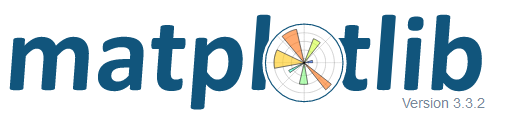


https://matplotlib.org/

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


### Scatter plots

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


This is what happens if you make a line plot of unsorted data:

#### Exercise - 2

Let's draw a circle using a scatter plot, afterwards fill it.

$$r^2 = sen(\phi)^2 + cos(\phi)^2$$

$$x=r \cdot cos(\phi)$$
$$y=r \cdot sin(\phi)$$


### Bar plots

Do not confuse with histograms

A bar plot is a plot that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.


#### Histogram
A histogram is an approximate representation of the distribution of numerical data.

To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size

[Wikipedia](https://en.wikipedia.org/wiki/Histogram)


## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

In [2]:
def generate_points(mu, sigma, A, B, npoints=150):
    xs = np.random.randn(npoints) * sigma + mu
    ys = A * xs + B + np.random.randn(npoints) * B /2
    return xs, ys


In [3]:
xs, ys = generate_points(5, 2, 1.2, 2)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

### `figure.subplots()`

This is probably the most convenient way of working with the object-oriented interface 

### Sharing axis

### Gridspec

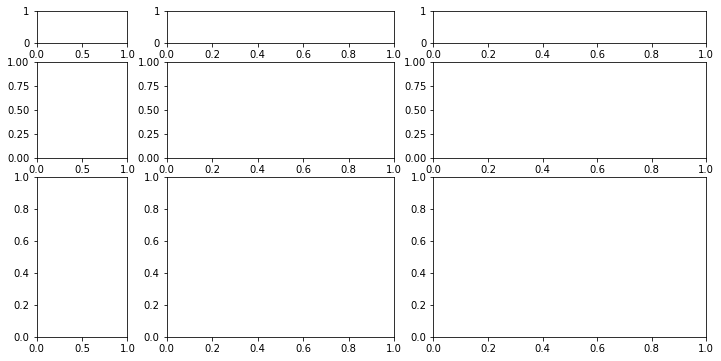

In [6]:
f = plt.figure()
f.set_size_inches(12,6)
spec = f.add_gridspec(3, 3, width_ratios=[2, 5, 6], height_ratios=[1, 3, 5])

for i in range(3):
    for j in range(3):
        
        f.add_subplot(spec[i, j])

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

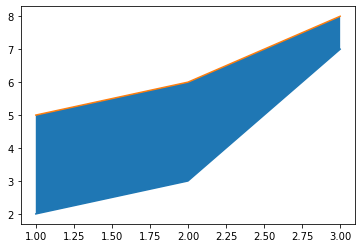

In [10]:
x = [1, 2, 3]
y1 = [2, 3, 7]
y2 = [5, 6, 8]

plt.fill_between(x, y1, y2)
plt.plot(x, y1)
plt.plot(x, y2)

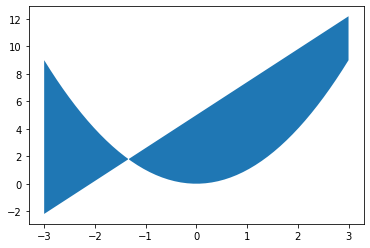

In [13]:
xs = np.linspace(-3,3)
ys_1 = 2.4 * xs + 5
ys_2 = xs ** 2

plt.fill_between(xs, ys_1, ys_2)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

In [15]:
ys_1 > ys_2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

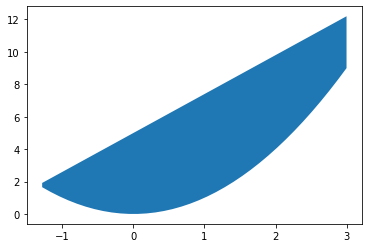

In [14]:
plt.fill_between(xs,ys_1,ys_2, where = ys_1 > ys_2)

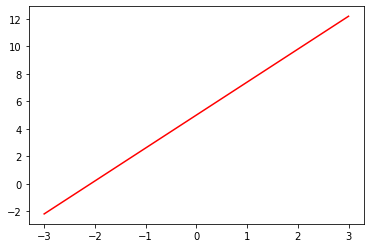

In [16]:
plt.plot(xs, ys_1, color= 'red')

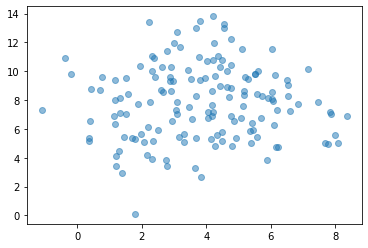

In [23]:
xs, yx = generate_points(4, 2, 1.2, 3)
plt.scatter(xs, ys, alpha = .5)

#alpha - tanto por uno de opacidad

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

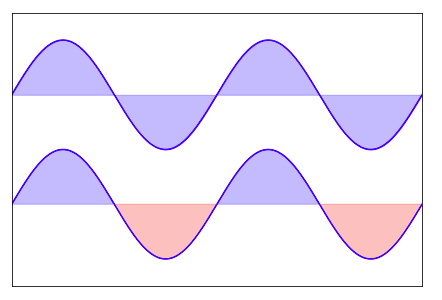



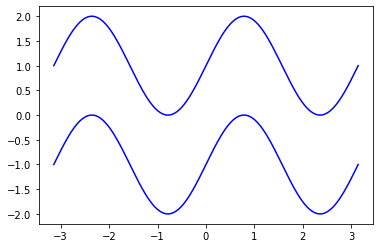

In [24]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()plt.show()

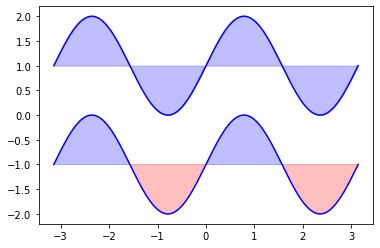

In [43]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)

plt.fill_between(X, Y+1, 1, color = 'blue', alpha = .25)
plt.fill_between(X, Y-1, -1, color = 'blue', alpha = .25, where = Y -1 > -1)
plt.fill_between(X, Y-1, -1, color = 'red', alpha = .25, where = Y -1 < -1)

## Line properties


### Color

https://matplotlib.org/tutorials/colors/colors.html

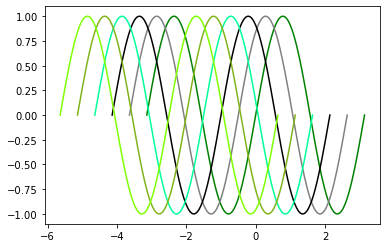

In [58]:
plt.plot(X,Y, color = 'g')
plt.plot(X-.5, Y, color = 'grey')
plt.plot(X-1, Y, color = '0')
plt.plot(X-1.5,Y, color='#00FF99') #HEXADECIMAL RRGGBB; F-FULL
plt.plot(X-2,Y, color=(.5, .7, .1))
plt.plot(X-2.5,Y, color='chartreuse')

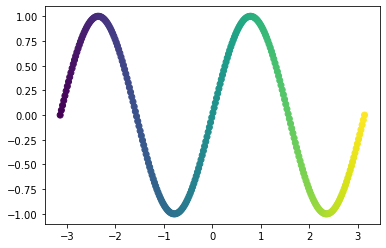

In [62]:
# plt.plot(X, Y, c = X) -- OJO, ESTO NO VALE, SOLO SE PUEDE PONER COLORES A LOS PUNTOS, NO A LAS LINEAS

plt.scatter(X, Y, c = X)

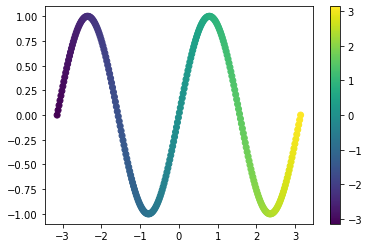

In [63]:
plt.scatter(X, Y, c = X)
plt.colorbar()

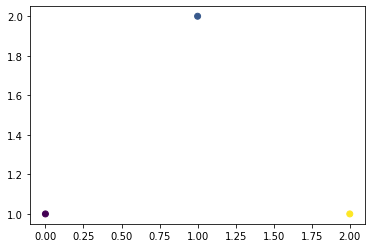

In [67]:
n = [10, 32, 90]
plt.scatter([0,1,2], [1,2,1], c=n)

### Colormaps

See https://matplotlib.org/users/colormaps.html

You need to choose the appropriate color.

Often, for powerful visualizations it's good to use a muted palette for most of the visualization and reserve one or two accent colors for the points that you want the audience to concentrate on.

If you want to use color to encode variables, choose the appropriate colormap according to the kind of variable that you want to encode.


#### Sequential

![Sequential Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

#### Divergent

![Divergent Colormaps](https://matplotlib.org/_images/sphx_glr_colormaps_004.png)

#### Qualitative

![Qualitative Colormaps](https://matplotlib.org/_images/sphx_glr_colormaps_006.png)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

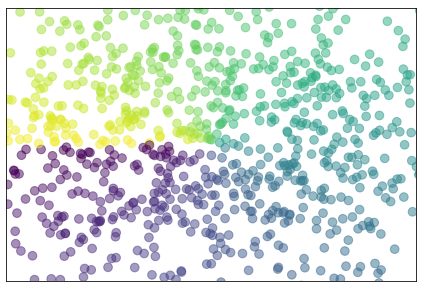

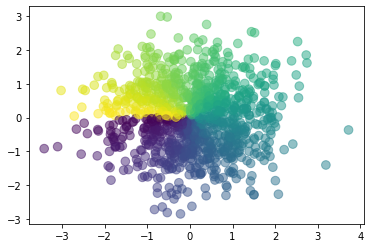

In [4]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

alpha = np.arctan2(Y,X)


plt.scatter(X,Y, s=75, cmap= 'viridis', c=alpha, alpha=.5)



### Markers and linestyles

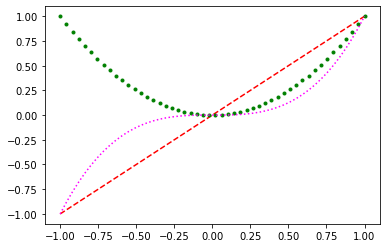

In [8]:
f, ax = plt.subplots(1,1)

xs = np.linspace(-1,1)
ys_1 = 1 * xs
ys_2 = xs ** 2
ys_3 = xs ** 3

ax.plot(xs, ys_1, 'r--')
ax.plot(xs, ys_2, 'g.')
ax.plot(xs, ys_3, linestyle=':',color='fuchsia')


While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

[(-0.5, 0.5), (-0.5, 0.5), Text(0.5, 1.0, 'superchart')]

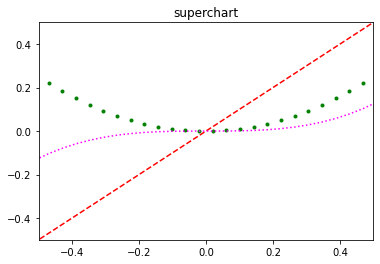

In [10]:
f, ax = plt.subplots(1,1)

xs = np.linspace(-1,1)
ys_1 = 1 * xs
ys_2 = xs ** 2
ys_3 = xs ** 3

ax.plot(xs, ys_1, 'r--')
ax.plot(xs, ys_2, 'g.')
ax.plot(xs, ys_3, linestyle=':',color='fuchsia')

ax.set(xlim=(-.5,.5), ylim=(-.5,.5),title = 'superchart')

Text(0.5, 1.0, 'superchart')

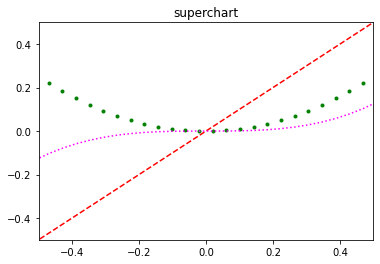

In [11]:
f, ax = plt.subplots(1,1)

xs = np.linspace(-1,1)
ys_1 = 1 * xs
ys_2 = xs ** 2
ys_3 = xs ** 3

ax.plot(xs, ys_1, 'r--')
ax.plot(xs, ys_2, 'g.')
ax.plot(xs, ys_3, linestyle=':',color='fuchsia')

ax.set_xlim((-.5,.5))
ax.set_ylim((-.5,.5))
ax.set_title('superchart')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

This is a standalone formula

$$f(x,a) = \frac{x^{2a}}{3}$$

This is an inline expression: $\sqrt{3}$, which you can use in matplotlib charts.

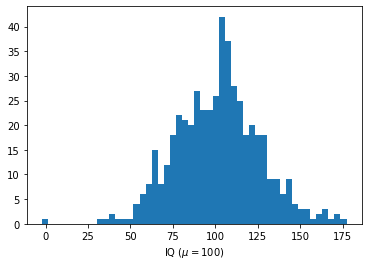

In [15]:
xs = np.random.randn(500) * 25 + 100
plt.hist(xs, bins= 50);
plt.xlabel('IQ ($\mu = 100$)');

[Different font families](https://www.oreilly.com/library/view/matplotlib-2x-by/9781788295260/9af01705-e09c-4d1e-a036-ca0260d5003b.xhtml).


*  'serif': Serifs are small decorative flourishes attached to stroke ends of characters. Fonts such as Times New Roman, Century, Garamond, and Palatino are serif fonts.
*  'sans-serif': This means without serif. Fonts such as Helvetica, Arial, Calibri, and DejaVu Sans are sans-serif.
*  'monospace': Monospace fonts have characters of the same width. They are usually used for code.
* 'cursive': Cursive features connected brush strokes, usually in italic, that give a sense of classical elegance.
* 'fantasy': Decorative fonts that look funny.

## Legends

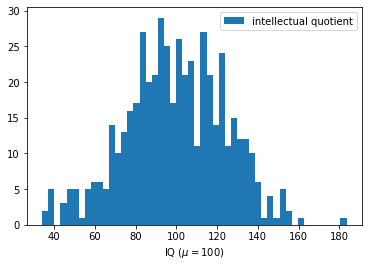

In [16]:
xs = np.random.randn(500) * 25 + 100
plt.hist(xs, bins= 50, label='intellectual quotient');
plt.xlabel('IQ ($\mu = 100$)');
plt.legend();

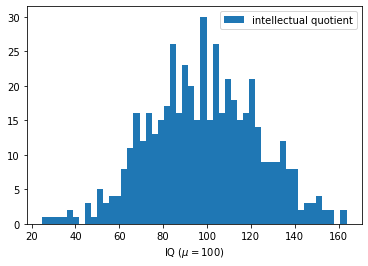

In [17]:
xs = np.random.randn(500) * 25 + 100
plt.hist(xs, bins= 50, label='intellectual quotient');
plt.xlabel('IQ ($\mu = 100$)');
plt.legend(loc='best');

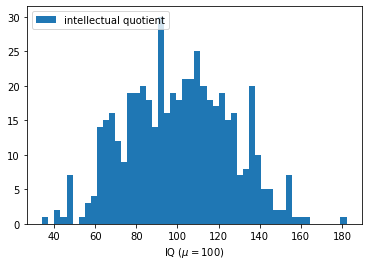

In [19]:
xs = np.random.randn(500) * 25 + 100
plt.hist(xs, bins= 50, label='intellectual quotient');
plt.xlabel('IQ ($\mu = 100$)');
plt.legend(loc='upper left');

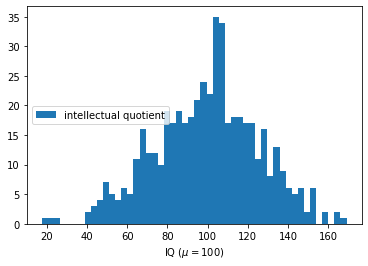

In [20]:
xs = np.random.randn(500) * 25 + 100
plt.hist(xs, bins= 50, label='intellectual quotient');
plt.xlabel('IQ ($\mu = 100$)');
plt.legend(loc='center left');

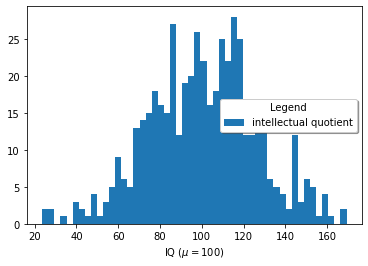

In [22]:
xs = np.random.randn(500) * 25 + 100
plt.hist(xs, bins= 50, label='intellectual quotient');
plt.xlabel('IQ ($\mu = 100$)');
plt.legend(loc='center right',shadow=True, title='Legend',fancybox=True)

#### Exercises

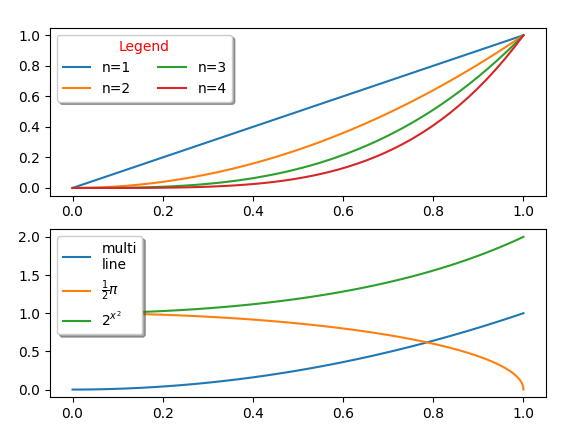

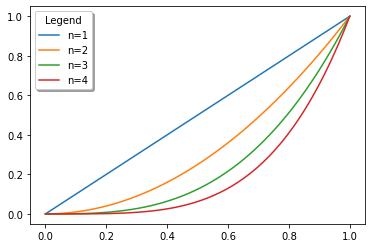

In [39]:
xs = np.linspace(0,1)
ys_1 = xs
ys_2 = xs**2
ys_3 = xs**3
ys_4 = xs**4

plt.plot(xs,ys_1,label='n=1')
plt.plot(xs,ys_2,label='n=2')
plt.plot(xs,ys_3,label='n=3')
plt.plot(xs,ys_4,label='n=4')

label='intellectual quotient'
plt.legend(loc='upper left',shadow=True, title='Legend',fancybox= True)

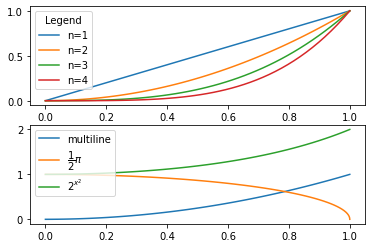

In [42]:
f, ax = plt.subplots(2,1)
xs = np.linspace(0,1)
for n in range(1,5):
    ax[0].plot(xs, xs**n, label= f'n={n}')


ax[0].legend(title='Legend')    

    
ax[1].plot(xs, xs**2,label='multiline')
pi_medios = np.linspace(0,np.pi / 2)
ax[1].plot(np.sin(pi_medios), np.cos(pi_medios), label='$\dfrac{1}{2}\pi$')
ax[1].plot(xs, 2**(xs**2),label='$2^{x^2}$')
ax[1].legend()



## Styles

In [43]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

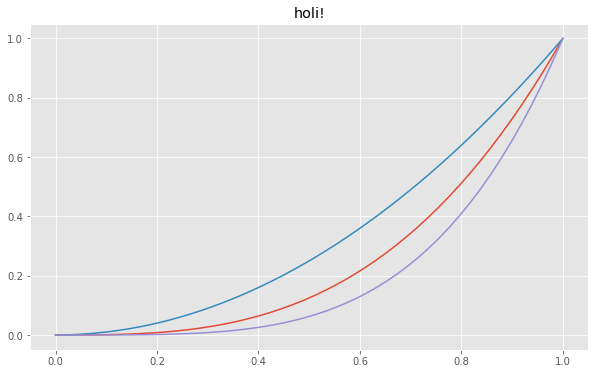

In [46]:
plt.style.use('ggplot')

plt.plot(xs,xs**3)
plt.plot(xs,xs**2)
plt.plot(xs,xs**4)
plt.gca().set_title('holi!')
plt.gcf().set_size_inches(10,6)

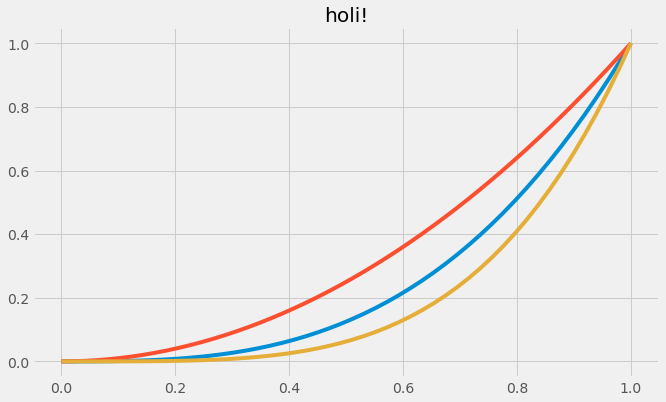

In [47]:
plt.style.use('fivethirtyeight')

plt.plot(xs,xs**3)
plt.plot(xs,xs**2)
plt.plot(xs,xs**4)
plt.gca().set_title('holi!')
plt.gcf().set_size_inches(10,6)

In [48]:
plt.style.use('ggplot')

## Ticks, tick labels, limits

### Ticks

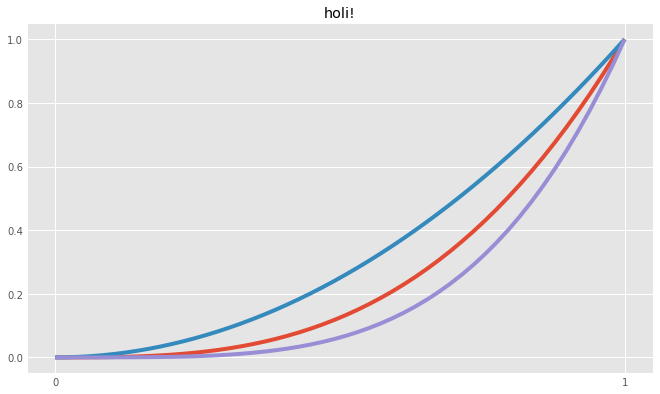

In [49]:
f, ax = plt.subplots(1,1)

ax.plot(xs,xs**3)
ax.plot(xs,xs**2)
ax.plot(xs,xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks([0,1])

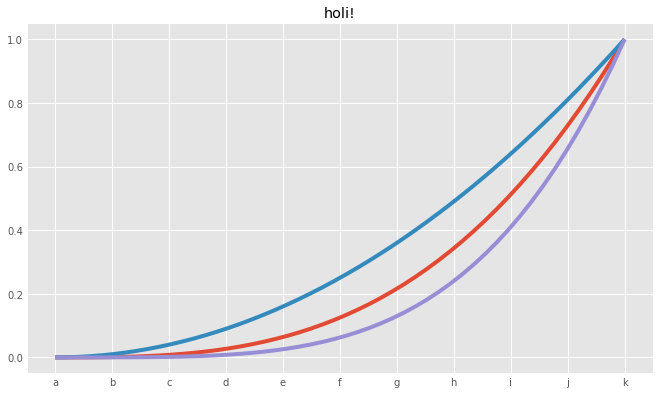

In [52]:
f, ax = plt.subplots(1,1)

ax.plot(xs,xs**3)
ax.plot(xs,xs**2)
ax.plot(xs,xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

### Tick labels

### Limits

In [ ]:
f, ax = plt.subplots(1,1)

ax.plot(xs,xs**3)
ax.plot(xs,xs**2)
ax.plot(xs,xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_xlim((-1,2))

### Axis scales


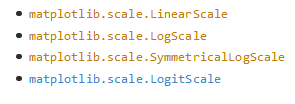




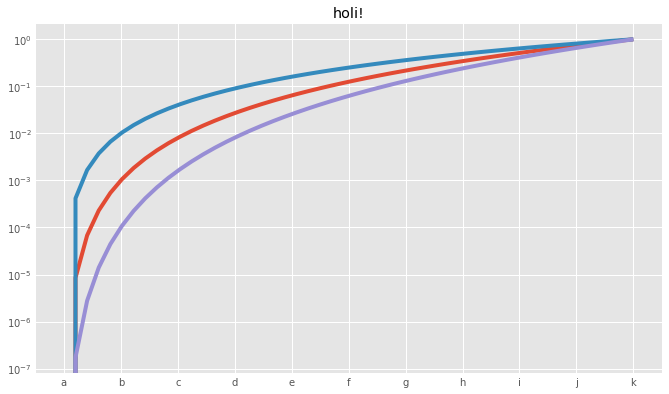

In [53]:
f, ax = plt.subplots(1,1)

ax.plot(xs,xs**3)
ax.plot(xs,xs**2)
ax.plot(xs,xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_yscale('log')

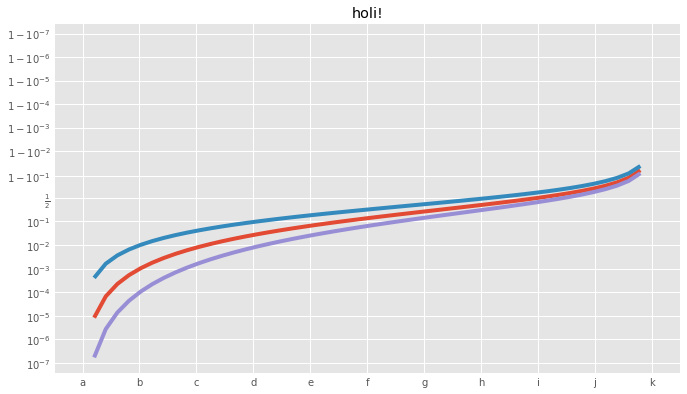

In [54]:
f, ax = plt.subplots(1,1)

ax.plot(xs,xs**3)
ax.plot(xs,xs**2)
ax.plot(xs,xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_yscale('logit')

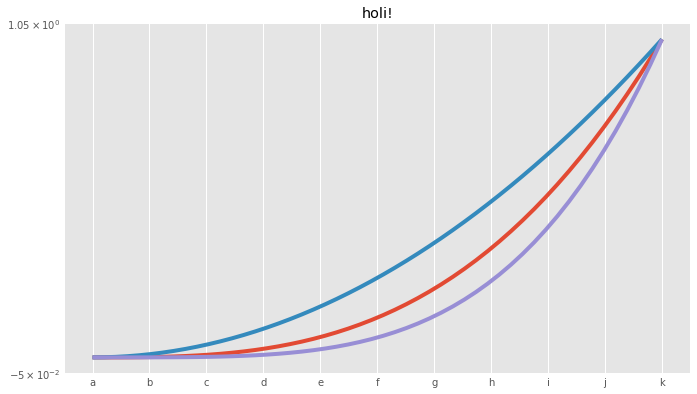

In [55]:
f, ax = plt.subplots(1,1)

ax.plot(xs,xs**3)
ax.plot(xs,xs**2)
ax.plot(xs,xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_yscale('symlog')

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the ``savefig()`` command.


total 1884
-rw-r--r-- 1 dsc dsc  422821 ene 15 19:17 06-visualization-I.empty.ipynb
-rw-rw-r-- 1 dsc dsc 1024998 ene 15 21:29 06_Visualization_LMdP_1.ipynb
-rw-r--r-- 1 dsc dsc  445142 ene 15 13:20 07-visualization-II.empty.ipynb
-rw-rw-r-- 1 dsc dsc   25608 ene 15 21:31 current_figure.png


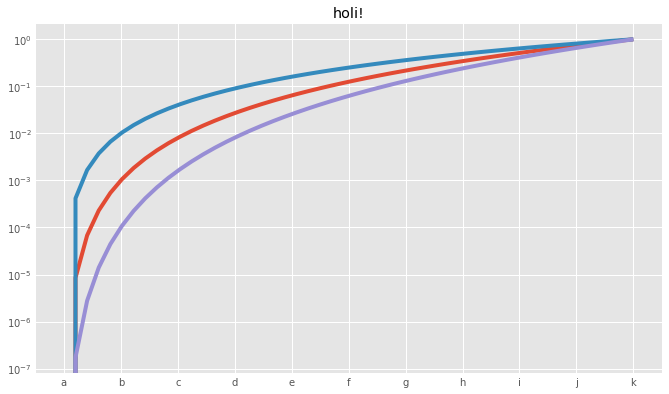

In [56]:
f, ax = plt.subplots(1,1)

ax.plot(xs,xs**3)
ax.plot(xs,xs**2)
ax.plot(xs,xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_yscale('log')

plt.savefig('current_figure.png')
!ls -l

### Contour plots

For representing one variable that is a function of other 2

In [77]:
xs = np.linspace(-2*np.pi, 2*np.pi, num=100)
ys = np.linspace(0, 4*np.pi,num=80)

X, Y = np.meshgrid(xs, ys)

In [78]:
X.shape, Y.shape

((80, 100), (80, 100))

In [79]:
Z = np.sin(X) + np.cos(Y)

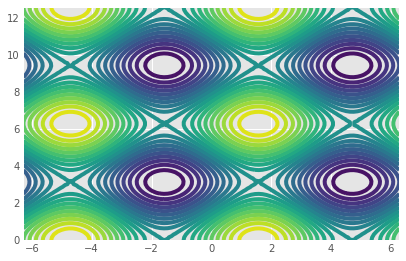

In [80]:
plt.contour(X, Y, Z, levels=20, cmap='viridis')

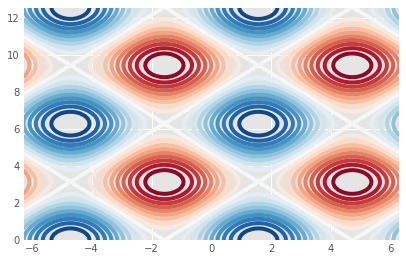

In [83]:
plt.contour(X, Y, Z, levels=20, cmap='RdBu')

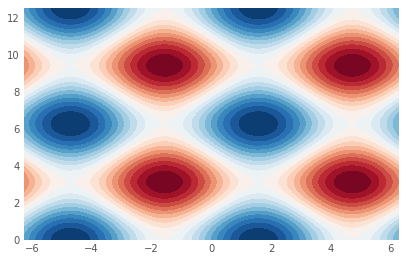

In [85]:
plt.contourf(X, Y, Z, levels=20, cmap='RdBu')

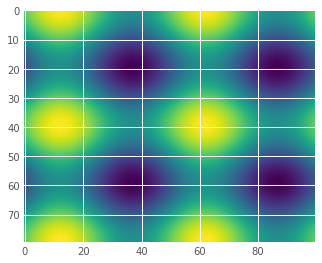

In [84]:
plt.imshow(Z)

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

### A note about 3D

Never use 3D plots in a flat medium. That is all.

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

[A quick look at altair](http://fernandoi.cl/blog/posts/altair/)


[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)